In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# 데이터 로딩
transform = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print("데이터 타입 :", type(train_data[0][0]))
print(f"훈련 데이터 수 : {len(train_data)}\n테스트 데이터 수 : {len(test_data)}")
print("입력 데이터 shape :", train_data[0][0].shape)
print("출력 데이터 :", train_data[0][1])

데이터 타입 : <class 'torch.Tensor'>
훈련 데이터 수 : 60000
테스트 데이터 수 : 10000
입력 데이터 shape : torch.Size([1, 28, 28])
출력 데이터 : 5


In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
img, label = next(iter(train_loader))

print(img.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


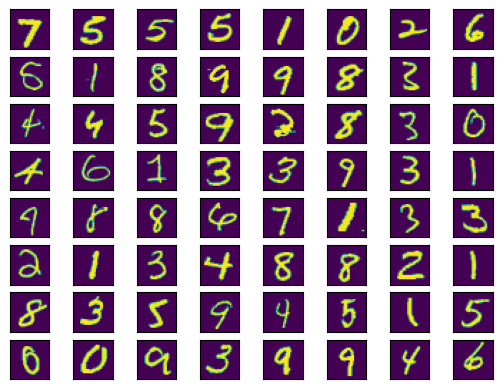

In [ ]:
import matplotlib.pyplot as plt

data = next(iter(train_loader))

fig, ax = plt.subplots(8, 8)
for i in range(64):
    ax[i//8][i%8].imshow(data[0][i].squeeze())
    ax[i//8][i%8].set_xticks([])
    ax[i//8][i%8].set_yticks([])

In [ ]:
# 간단한 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # 입력 크기 28*28
        self.fc2 = nn.Linear(128, 10)     # 출력 크기 10 (0~9 숫자)

    def forward(self, x):
        x = x.view(-1, 28*28)  # 28x28 이미지를 1차원 벡터로 변환
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
input_data = train_data[0][0]
print(input_data.shape)
output = model(input_data)
print(output)

torch.Size([1, 28, 28])
tensor([[-0.0111,  0.1365, -0.0813,  0.0550, -0.0988, -0.2928,  0.0817, -0.6252,
         -0.4139, -0.0065]], grad_fn=<AddmmBackward0>)


In [ ]:
# 모델, 손실 함수, 옵티마이저 정의


criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류에 적합한 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 모델 훈련
for epoch in range(5):  # 5번 학습
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

Epoch 1, Loss: 0.5785
Epoch 2, Loss: 0.2098
Epoch 3, Loss: 0.1239
Epoch 4, Loss: 0.2112
Epoch 5, Loss: 0.2200


In [ ]:
# 모델 성능 테스트
model.eval()
correct = 0
total = 0
with torch.no_grad():  # 테스트 중에는 기울기 계산 필요 없음
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 92.10%


Text(0.5, 1.0, 'label : 2, pred : 7')

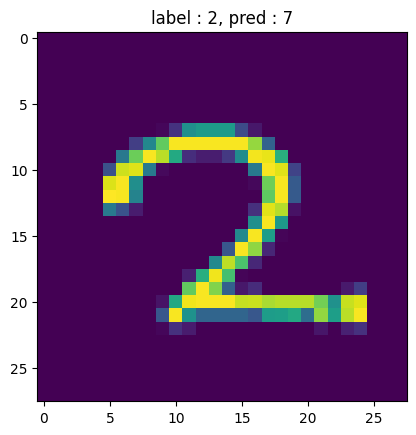

In [ ]:
idx = 77

img = test_data[idx][0]
label = test_data[idx][1]

with torch.no_grad():
    pred = model(img.unsqueeze(0))
pred = torch.argmax(pred, dim=-1)

plt.imshow(img.squeeze())
plt.title(f"label : {label}, pred : {pred.item()}")